In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split

from import_class import DataHandler
from CNN_class import CNN_3

2025-01-11 21:14:41.843098: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-11 21:14:41.849984: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-11 21:14:41.857925: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-11 21:14:41.860216: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-11 21:14:41.866380: I tensorflow/core/platform/cpu_feature_guar

In [2]:
data_handler = DataHandler()

1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1736655284.916775  128521 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1736655284.940635  128521 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1736655284.942626  128521 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1736655284.945630  128521 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [6]:
train_dataset, val_dataset, X_test, y_test = data_handler.load_data("all_inputs_down_samp256.npy", "all_targets_down_samp256.npy")

input shape: (3467, 256, 256, 1)
X test shape: (694, 256, 256, 1)


In [7]:
X_test.shape

(694, 256, 256, 1)

In [9]:
cnn = CNN_3((256,256,1))

In [10]:
cnn.compile_model(learning_rate=0.00001)

In [11]:
training = cnn.train_model(train_data=train_dataset, validation_data=val_dataset,epochs=400)

Epoch 1/400


I0000 00:00:1736655379.526065  128663 service.cc:146] XLA service 0x7d4f74006180 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736655379.526087  128663 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 SUPER, Compute Capability 8.9
2025-01-11 21:16:19.557845: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-11 21:16:19.683761: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


30/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4511 - loss: 0.7739

I0000 00:00:1736655381.745694  128663 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.4672 - loss: 0.7621 - val_accuracy: 0.4468 - val_loss: 0.6991
Epoch 2/400
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4780 - loss: 0.7465 - val_accuracy: 0.4468 - val_loss: 0.7088
Epoch 3/400
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4952 - loss: 0.7260 - val_accuracy: 0.4468 - val_loss: 0.7278
Epoch 4/400
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4932 - loss: 0.7180 - val_accuracy: 0.4468 - val_loss: 0.7555
Epoch 5/400
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5005 - loss: 0.7111 - val_accuracy: 0.4468 - val_loss: 0.7930
Epoch 6/400
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5333 - loss: 0.6942 - val_accuracy: 0.4468 - val_loss: 0.8227
Epoch 7/400
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5452 - loss: 0.6895 - val_accuracy: 0.4468 - val_loss: 0.8184
Epoch 8/400
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5655 - loss: 0.6827 - val_accuracy: 0.4541 - val_loss: 0.

In [ ]:
(X_test)

In [12]:
import matplotlib.pyplot as plt

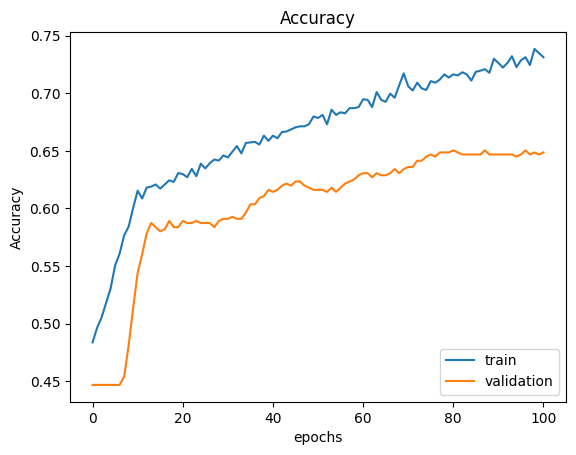

In [13]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='lower right')
plt.title('Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.show()

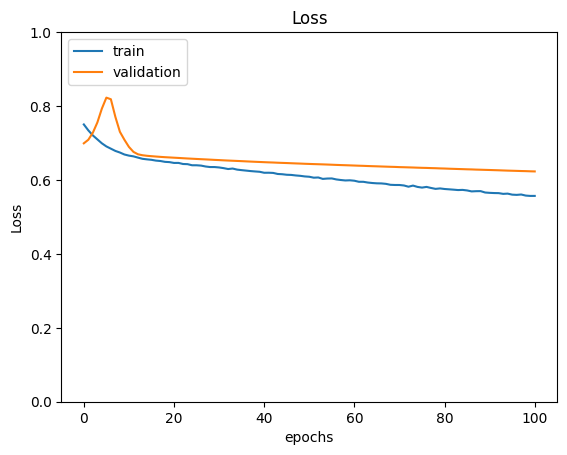

In [14]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['train', 'validation'], loc='upper left')
plt.title('Loss')
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.ylim(0,1)
plt.show()

In [16]:
test_metrics = cnn.evaluate_model(X_test=X_test,y_test=y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6651 - loss: 0.6298 


In [17]:
test_metrics

[0.6082035303115845, 0.6844380497932434]

In [18]:
cnn.predict(X=X_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[0.6603103 ],
       [0.7112041 ],
       [0.49914756],
       [0.33645856],
       [0.6507701 ],
       [0.54830086],
       [0.75761795],
       [0.67007047],
       [0.70840245],
       [0.5339143 ],
       [0.374473  ],
       [0.45229995],
       [0.63311714],
       [0.4786583 ],
       [0.770427  ],
       [0.73754984],
       [0.6240297 ],
       [0.59019756],
       [0.6150094 ],
       [0.6650762 ],
       [0.69621634],
       [0.36849678],
       [0.5879864 ],
       [0.5727643 ],
       [0.6409985 ],
       [0.580168  ],
       [0.3365293 ],
       [0.43832374],
       [0.48020768],
       [0.716491  ],
       [0.26592216],
       [0.43336606],
       [0.60637295],
       [0.3604967 ],
       [0.7469896 ],
       [0.36926198],
       [0.39674675],
       [0.4243825 ],
       [0.3297595 ],
       [0.69719183],
       [0.6253203 ],
       [0.71575093],
       [0.6285306 ],
       [0.47523788],
       [0.51254046],
       [0.67600834],
       [0.49363977],
       [0.430